#                           Customer Data Pre-processing ASSESSMENT                                   
#### November, 2022


## Problem Statement

### The task before us is a Data Pre-processing problem. we are provided with a company customers record in csv file and our objecive is to make  produce a rich file that is appropriate for analysis.
 - The task is divided into two part:
 - a. The Data processing part using json format
 - b. The Data Visualization part.
 
     - Brief description of the steps taken to solve the problem
         - Import the file and read it with csv reader to have a feel of how the the data looks like and note down necessary observations.
         - Converting the flat file into a nested list of dictionary where a sub-dictionary for the Vehicle, Credit card and Address item are created to hold key and values of thier respective types.
         - In this process, the values are casted into appropriate types (integers, float, bool are called where necessary)
         - from observation it was noted that we have problematic rows for the dependant section and this is treated by assign values to them and collecting a list of rows where this issue exist
         - Our well organized list is then converted into a json file and sortation of unvalid cards, retired and employed customers are carried out.
         - the second section contains visuals that are assigned to a variable and they were append into an empty dictionary that was looped through for saving the respresentaion of relationships.


In [1]:
# We will use this cell to import all necessary libraries for this question.
# we are tasked to convert the file from a flat file and create a nested dictiondary for the vehicle, 
# address and credit card
import csv 
import json 
import os


## Qustion 1: Read in the provided ACW Data using the CSV library.

In [2]:
# to read the csv data in see how the header looks like

with  open('acw_user_data.csv', 'r') as file_name:
    file_ = csv.reader(file_name)
    
    # looping through the file to read the lines
    
    for lines in file_:
        print(lines)
    

['Address Street', 'Address City', 'Address Postcode', 'Age (Years)', 'Distance Commuted to Work (miles)', 'Employer Company', 'Credit Card Start Date', 'Credit Card Expiry Date', 'Credit Card Number', 'Credit Card CVV', 'Dependants', 'First Name', 'Bank IBAN', 'Last Name', 'Marital Status', 'Yearly Pension (GBP)', 'Retired', 'Yearly Salary (GBP)', 'Sex', 'Vehicle Make', 'Vehicle Model', 'Vehicle Year', 'Vehicle Type']
['70 Lydia isle', 'Lake Conor', 'S71 7XZ', '89', '0', 'N/A', '08/18', '11/27', '676373692463', '875', '3', 'Kieran', 'GB62PQKB71416034141571', 'Wilson', 'married or civil partner', '7257', 'True', '72838', 'Male', 'Hyundai', 'Bonneville', '2009', 'Pickup']
['00 Wheeler wells', 'Chapmanton', 'L2 7BT', '46', '13.72', 'Begum-Williams', '08/12', '11/26', '4529436854129855', '583', '1', 'Jonathan', 'GB37UMCO54540228728019', 'Thomas', 'married or civil partner', '0', 'False', '54016', 'Male', 'Nissan', 'ATS', '1996', 'Coupe']
['Studio 33K Joel walk', 'Randallborough', 'ME3N 1G

## Question 2.
## We are tasked to convert all flat structures into nested structures. in the below format:
    - Vehicle = consists of make, model, year, and type
    - Credit Card = consists of start date, end date, number, security code, and IBAN.
    - Address = consists of the main address, city, and postcode.
 - We may need to pay attention to the output before this cell to see how the list looks like
 - also we  need to make sure the values are casted appropriately

In [3]:
# we need to create a universal empty list where all our arrangement will be appended into
# I want to open the file (without context manager) in a read mode and assign it to the variable file_name 

customer_records = []
file_name = open('acw_user_data.csv', 'r')

# to read it we will be using DictReader to read the file because we have a aim to convert the file into a nested.. 
# dictionary

csv_reader = csv.DictReader(file_name)

In [4]:
# here, I created a function that will be used to convert the file to a rich nested list of dictionary where all.. 
# items are well represented
# the function accepts one object, and it is any flat structure file that will be passed into it.
# and returns the list of dictionary

def arrange_list(csv_reader):
    
    # looping through the file
    for num, row in enumerate (csv_reader):
        
        # this dictionary is created to hold key and value in the format showed in page 5 of the question
        
        full_records = {}
        
        # creating an empty list for  vehicle, credit card, and address to hold all their keys and values respectively
        # and appending the values to our named key below
                
        vehicle = {}
        credit_card = {}
        address = {}
        
        # all I am doing here is to read through the line of the file 'acw_user_data' and picking the rows where... 
        # each of the..
        # above empty list appears and assigning them to the created key value in the LHS (Left hand side)
        #  will need to cast some calues into their appropriate type in this section

        vehicle['Make'] = row['Vehicle Make']
        vehicle['Model'] = row['Vehicle Model']
        vehicle['Year'] = row['Vehicle Year']
        vehicle['Type'] = row['Vehicle Type']
    
       
        credit_card['Start Date'] = row['Credit Card Start Date']
        credit_card['Expiry Date'] = row['Credit Card Expiry Date']
        credit_card['Number'] = row['Credit Card Number']
        credit_card['CVV'] = int(row['Credit Card CVV'])
        credit_card['IBAN'] = row['Bank IBAN']
    
        
        address['street'] = row['Address Street']
        address['city'] = row['Address City']
        address['post code'] =row['Address Postcode']
                
        # The below operations are for arrangement and the sequence of how it will appear upon execution of the... 
        # function
        # the casting of values are also done in this section, this is to present the correct type and format... 
        # in which the values are to be rationally.
        
        full_records['first_name'] = row['First Name']
        full_records['second_name'] = row['Last Name']
        full_records['age'] = int(row['Age (Years)'])
        full_records['sex'] =row['Sex']
        full_records['retired'] = row['Retired'].lower().capitalize() == "True"
        full_records['marital_status'] = row['Marital Status']
        full_records['dependants'] = row['Dependants']    # we have some missing values here, we will need not to... 
        # cast it for now because of some empty row
        full_records['salary'] = round(float(row['Yearly Salary (GBP)']),2) # round the salary to two decimal point
        full_records['pension'] = float(row['Yearly Pension (GBP)'])
        full_records['company'] = row['Employer Company']
        full_records['commute_distance'] = float(row['Distance Commuted to Work (miles)'])
        full_records['vehicle'] = vehicle
        full_records['Credit Card'] = credit_card
        full_records['Address'] = address
        
        #  append the full record dictionary into the universal customer_records list
        # making it a list of dictionary 
        customer_records.append(full_records)
            
    return customer_records
            

In [5]:
# from the above cell we noticed that the opened file was assigned to a variable called 'csv_reader'
#  need to pass the file into the fuction created to see the final output of the customers and their features

arrange_list(csv_reader)


[{'first_name': 'Kieran',
  'second_name': 'Wilson',
  'age': 89,
  'sex': 'Male',
  'retired': True,
  'marital_status': 'married or civil partner',
  'dependants': '3',
  'salary': 72838.0,
  'pension': 7257.0,
  'company': 'N/A',
  'commute_distance': 0.0,
  'vehicle': {'Make': 'Hyundai',
   'Model': 'Bonneville',
   'Year': '2009',
   'Type': 'Pickup'},
  'Credit Card': {'Start Date': '08/18',
   'Expiry Date': '11/27',
   'Number': '676373692463',
   'CVV': 875,
   'IBAN': 'GB62PQKB71416034141571'},
  'Address': {'street': '70 Lydia isle',
   'city': 'Lake Conor',
   'post code': 'S71 7XZ'}},
 {'first_name': 'Jonathan',
  'second_name': 'Thomas',
  'age': 46,
  'sex': 'Male',
  'retired': False,
  'marital_status': 'married or civil partner',
  'dependants': '1',
  'salary': 54016.0,
  'pension': 0.0,
  'company': 'Begum-Williams',
  'commute_distance': 13.72,
  'vehicle': {'Make': 'Nissan',
   'Model': 'ATS',
   'Year': '1996',
   'Type': 'Coupe'},
  'Credit Card': {'Start Date':

### Question 3

- we noticed some errors from the dependant section of our list and have to address them by assigning values to the empty rows and also appending them in list to see the rows that are problematic

In [6]:
# creating an empty list that will be used to hold all problematic rows
problem_row = []

# looping through the file 'customer_records' to pick the empty rows in the dependant section 
#  can access the dependant section through indexing and carryout the necessary correction by assigning a value to...
# the empty list

for line in customer_records:
    if line['dependants'] == '': # if the dependant are empty
        line['dependants'] = 590  # assign 590 to the empty row

# looping through the customer list to append the rows that has 590 into our problem rows
for num, line in enumerate(customer_records):
    if line['dependants'] == 590:
        problem_row.append(num)
        
print('problematic rows for dependants: '+ f'{problem_row}')
    

problematic rows for dependants: [21, 109, 179, 205, 270, 272, 274, 358, 460, 468, 579, 636, 679, 725, 822, 865, 917, 931, 983]


### Question 4

### Here we will write our list of dictionary (customer_records)  into a json file 
- Write all records to a processed.json file in the JSON data format. This should be a list of dictionaries, where each index of the list is a dictionary representing a singular person.

In [7]:
#  will use the context manager to open the file in json in write mode
# and call the function json.dump to input the list into the new file created
#  use the indent= 4 method to help with the readability of the output
with open('processed.json', mode='w') as outfile:
    json.dump(customer_records, outfile, indent = 4)
   

### Question 5

- We were tasked to create two additional file outputs, retired.json and employed.json, that should contain all retired customers (as indicated by the retired field in the CSV), and all employed customers respectively (as indicated by the employer field in the CSV) and be in the JSON data format.

In [8]:
# using the context manager to open the file, N.B this file closes after you run the cell of codes
#  will create two empty list for retired customer and employed customer
# looping through the dictionary to assign the clustered retired customers into the retired customer list 
# and the employed customers into the employed customers list

with open('processed.json', mode='r') as file:
    
    retired_customers = []
    employed_customers = []
    myfile = json.load(file)
    
    for i,line in enumerate(myfile):
        
        if dict(line)['retired'] == True:
            
            retired_customers.append(line)
            
        elif dict(line)['company'] != 'N/A':
            
            employed_customers.append(line)


# coverting the list of dictionary into a json file we assigned it to the variables retired and employed respectively

retired = json.dumps(retired_customers)
employed = json.dumps(employed_customers)

# creating json file for retired and employed customers and dump the list of dictionaries(retired and employed) into them...
# respectively

with open('retired.json', mode='w') as outfile:
    outfile.write(retired)
with open('employed.json', mode='w') as infile:
    infile.write(employed)




### Question 6

- In this task we are asked to sort the card list based on the dates.
-  The client noticed some issue in some entries, stating that some customers have more than 10years between their start date and end date and we need to separate it
- into a file known as remove_ccard.json 

In [9]:
#  will need to create a function that will take in the card that is removed

def unvalid_cards(lines):
    # here  call a variable connector and set it to be true 
    unvalid = True
    
    
    # by indexing we want to pick the last two strings on the 
    # credit card start date and end date respectively and cast them to integers
    start_date = int(lines['Credit Card Start Date'][-2:])
    end_date = int(lines['Credit Card Expiry Date'] [-2:])
    
    #  get the difference between the end date and start date to see if they are greater than 10years
    validity_difference = end_date - start_date
    
    #  call it if condition to drop the cards that are less than 10years
    if validity_difference < 10:
        unvalid = False
    return unvalid

    
#  open the file in read mode
# create an empty list to capture all the unvalid card
# read the line and use the unvalid_cards function to get the pick out the dates that are greater than 10years

with open('acw_user_data.csv', mode = 'r') as file_name:
    
    file_reader =  csv.DictReader(file_name)
    
    unvalid_ccards = []

    for lines in file_reader:
        unvalid = unvalid_cards(lines)
        if unvalid == True:
            lines['unvalid'] = unvalid
            unvalid_ccards.append(lines)
      
    

In [10]:
#  use this to write into the creted json file, the list of unvalid_ccards as requested by the task
with open('remove_ccard.json', mode='w') as outfile:
    json.dump(unvalid_ccards, outfile, indent = 4) 

### Question 7

-  we are tasked with calculating some additional metrics which will be used for ranking customers. we need to create a new data attribute for our customers called “Salary-Commute”. Reading in from processed.json:    
    - Add, and calculate appropriately, this new attribute. It should represent the Salary that a customer earns, per mile of their commute.i. Note: If a person travels 1 or fewer commute miles, then their salarycommute would be just their salary.      
    - b. Sort these records by that new metric, in ascending order. 
    
    - c. Store the output file out as a JSON format, for a commute.json file.

In [11]:
outfile =  open('processed.json', mode = 'r') 
myfile = json.load(outfile)
    
# following the steps from the above markdown cell to answer the questions
Salary_commute = []
    
for lines in myfile:
    distance_commute = lines['commute_distance']
    salary =  lines['salary']
        
    if distance_commute <= 1:
        lines['Salary_commute'] = salary
    else:
        lines['Salary_commute'] = round(salary/distance_commute,2) # round the salary to 2 decimal points
        
    Salary_commute.append(lines)
    
# sorting this in ascending order
Salary_commute_list = sorted(Salary_commute, key = lambda d: d['Salary_commute'])

In [12]:
# writing the salary commute list of dictionary into a json file named salary_commute
with open('Salary_commute.json', mode='w') as outfile:
    json.dump(Salary_commute_list, outfile, indent = 4) 

### Section 2
#### Question 1

- We are tasked to Obtain the Data Series for Salary, and Age, and calculate the following:
    -    Mean Salary
    -  Median Age

In [13]:
# I will need to import necessary library needed for this task, such as pandas and matplotlib

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math



In [14]:
person_records = pd.read_csv('acw_user_data.csv') # using pandas to place the file in a dataFrame
person_records.head()

,Address Street,Address City,Address Postcode,Age (Years),Distance Commuted to Work (miles),Employer Company,Credit Card Start Date,Credit Card Expiry Date,Credit Card Number,Credit Card CVV,...,Last Name,Marital Status,Yearly Pension (GBP),Retired,Yearly Salary (GBP),Sex,Vehicle Make,Vehicle Model,Vehicle Year,Vehicle Type
0,70 Lydia isle,Lake Conor,S71 7XZ,89,0.00,NaN,08/18,11/27,676373692463,875,...,Wilson,married or civil partner,7257,True,72838,Male,Hyundai,Bonneville,2009,Pickup
1,00 Wheeler wells,Chapmanton,L2 7BT,46,13.72,Begum-Williams,08/12,11/26,4529436854129855,583,...,Thomas,married or civil partner,0,False,54016,Male,Nissan,ATS,1996,Coupe
2,Studio 33K Joel walk,Randallborough,ME3N 1GH,22,16.02,Hill-Wright,11/19,07/27,4091726363083888495,422,...,Jones,married or civil partner,0,False,68049,Male,GMC,Achieva,2015,"Convertible, Coupe"
3,Studio 46S Bethany lights,East Reece,E10 9RJ,56,19.35,Green LLC,10/17,04/18,4671332769487632633,669,...,Shaw,married or civil partner,0,False,91337,Male,Scion,F150 SuperCrew Cab,1994,Pickup
4,Flat 3 Christine views,Fletcherstad,WS2 9SN,57,5.94,"Hill, Evans and Harrison",04/19,11/27,2245094149128526,659,...,O'Brien,married or civil partner,0,False,18446,Female,Buick,Outback,2020,SUV


In [15]:
# to access the columns of the data frame for guide on how the data are represented
person_records.columns

Index(['Address Street', 'Address City', 'Address Postcode', 'Age (Years)',
       'Distance Commuted to Work (miles)', 'Employer Company',
       'Credit Card Start Date', 'Credit Card Expiry Date',
       'Credit Card Number', 'Credit Card CVV', 'Dependants', 'First Name',
       'Bank IBAN', 'Last Name', 'Marital Status', 'Yearly Pension (GBP)',
       'Retired', 'Yearly Salary (GBP)', 'Sex', 'Vehicle Make',
       'Vehicle Model', 'Vehicle Year', 'Vehicle Type'],
      dtype='object')

In [16]:
# to obtain the data series for salary
#  index the data frame by calling the column header for salary
person_records['Yearly Salary (GBP)']

0      72838
1      54016
2      68049
3      91337
4      18446
       ...  
995    84645
996    93314
997    20940
998    82412
999    25788
Name: Yearly Salary (GBP), Length: 1000, dtype: int64

In [17]:
# to obtain data series for Age
#  index the data frame by calling the column header for Age
person_records['Age (Years)']

0      89
1      46
2      22
3      56
4      57
       ..
995    48
996    22
997    38
998    45
999    80
Name: Age (Years), Length: 1000, dtype: int64

In [18]:
age = person_records['Age (Years)'] # the age series is stored in the variable age
salary = person_records['Yearly Salary (GBP)'] # the salary series is stored in the variable salary

# calling the mean and median methods to get the mean and median values of salary and age respective
median_age = int(age.median()) # cast the age to return an absolute number
mean_salary = round(salary.mean(),2) # round the value to 2 decimal points
print(f'The mean salary is : {mean_salary} GBP ')  # to print the mean Salary
print(f'The median age is : { median_age} Years') # to get the median Age

The mean salary is : 57814.08 GBP 
The median age is : 54 Years


### 2. Perform univariate plots of the following data attributes:
-  Age, calculating how many bins would be required for a bin_width of 5.
- Dependents, fixing data errors with seaborn itself.
-  Age (of default bins), conditioned on Marital Status

In [19]:
# we need to calculate how many bin is required
# first we check for the maximum and minimum age by calling the max and min methods
# assign our result to two different variables
# get the difference between the ages
# divide our result by the binwidth

maximum_age = age.max()
minimum_age = age.min()

age_diff = maximum_age - minimum_age

# math function for rounding up
bin_number = math.ceil(age_diff/ 5) 

print(f' The number of bin to use is: {bin_number} bins')

 The number of bin to use is: 15 bins


Text(0.5, 1.0, 'Distribution of Customers Age ')

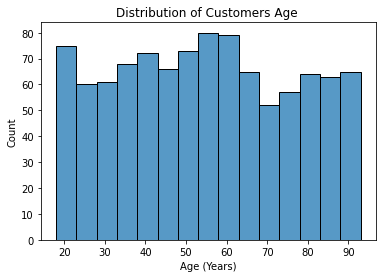

In [20]:
# we are to display a univariate graph showing the age distribution

# the name 'display_age' is assigned to our plot
display_age = sns.histplot(data = person_records, x = 'Age (Years)', binwidth = 5, bins = 15)
# calling the method title to give a title to the representation below
plt.title('Distribution of Customers Age ' )

Text(0.5, 1.0, 'Distribution of Employee Ages and Marital Status')

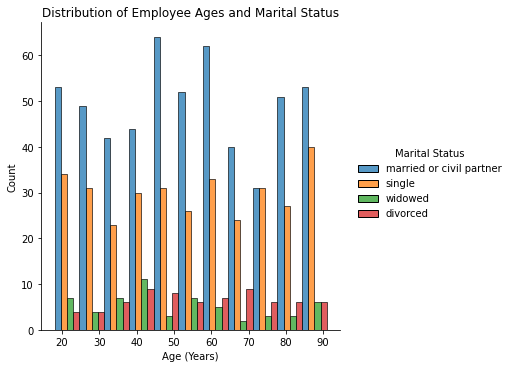

In [21]:
# the name 'cond_age' is assigned to our plot
cond_age = sns.displot(data = person_records, x = 'Age (Years)', hue = 'Marital Status', multiple ='dodge')
# calling the method title to give a title to the representation below
plt.title('Distribution of Employee Ages and Marital Status')

In [22]:
# calling then fillna method and append 590 to the missing row of dependants
person_records['Dependants'].fillna(value = 590 , inplace = True) 

Text(0.5, 1.0, 'Distribution of Customer by Dependants ')

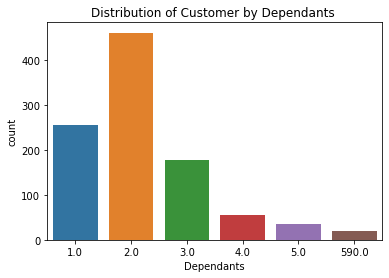

In [23]:
# dependents are integers and it rational to use countplots
display_dependant = sns.countplot(data = person_records, x = 'Dependants')
plt.title('Distribution of Customer by Dependants ' )

### Question 3
- Perform multivariate plots with the following data attributes:
    - Commuted distance against salary.
    - Age against Salary
    - Age against Salary conditioned by Dependants

Text(0.5, 1.0, 'Distribution of Commuted distance againts yearly Salary')

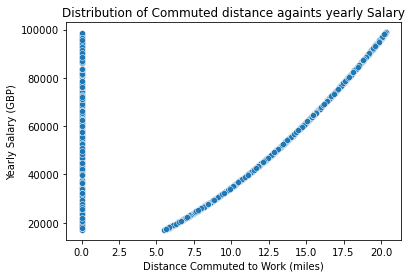

In [24]:
# comparing two we use scattered plot 
# assiging the plot to a variable names "distance_salary_display"
distance_salary_display = sns.scatterplot(data = person_records, x = 'Distance Commuted to Work (miles)', y = 'Yearly Salary (GBP)')
plt.title('Distribution of Commuted distance againts yearly Salary')

Text(0.5, 1.0, 'Distribution of Age against Salary')

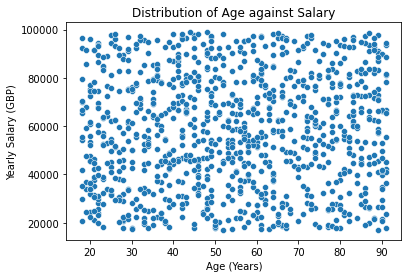

In [25]:
# assiging the plot to a variable names "age_salary_display"
age_salary_display = sns.scatterplot(data = person_records, x = 'Age (Years)', y = 'Yearly Salary (GBP)')
plt.title("Distribution of Age against Salary")

Text(0.5, 1.0, 'Distribution of Age againts Salary showing Dependant Effect')

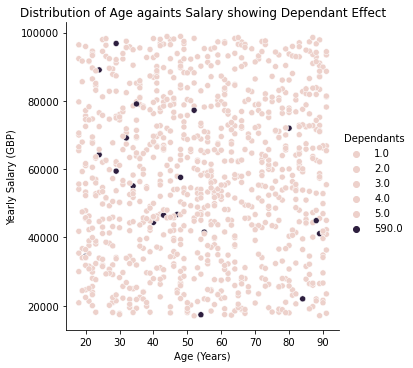

In [26]:
age_sal_dependant_display = sns.relplot(data = person_records, x = 'Age (Years)', y = 'Yearly Salary (GBP)', hue = 'Dependants')
plt.title('Distribution of Age againts Salary showing Dependant Effect')

In [27]:
##  saving the figures
# creating an empty dictionary to hold key(path name) and value( plot displayed)

display_library = {}

display_library["display_age.png"] = display_age
display_library["cond_age.png"] = cond_age
display_library["display_dependant.png"] = display_dependant
display_library["distance_salary_display.png"]= distance_salary_display
display_library["age_salary_display.png"] = age_salary_display
display_library["age_sal_dependant_display.png"] = age_sal_dependant_display

In [28]:
display_library

{'display_age.png': <AxesSubplot:title={'center':'Distribution of Customers Age '}, xlabel='Age (Years)', ylabel='Count'>,
 'cond_age.png': <seaborn.axisgrid.FacetGrid at 0x26946bcbb20>,
 'display_dependant.png': <AxesSubplot:title={'center':'Distribution of Customer by Dependants '}, xlabel='Dependants', ylabel='count'>,
 'distance_salary_display.png': <AxesSubplot:title={'center':'Distribution of Commuted distance againts yearly Salary'}, xlabel='Distance Commuted to Work (miles)', ylabel='Yearly Salary (GBP)'>,
 'age_salary_display.png': <AxesSubplot:title={'center':'Distribution of Age against Salary'}, xlabel='Age (Years)', ylabel='Yearly Salary (GBP)'>,
 'age_sal_dependant_display.png': <seaborn.axisgrid.FacetGrid at 0x269474c0fa0>}

In [29]:
# looping through  to save each items of the dictionary
# using the .savefig function to save each representations to their respective file path in .png

for key, value in display_library.items():
    # using the try except approach to getthe Attribute 'AxesSubplot' error 
    try:
        value.savefig(key)
    except AttributeError: # to catch and fix the error'AxesSubplot' object has no attribute 'savefig'
        value.get_figure().savefig(key)
        
